In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=2)
sns.set_style("whitegrid")
np.seterr(divide='ignore');

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-kvh8lhj5 because the default path (/tmp/cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# GPS Application: N-D Newton's Method
Global Positioning System (GPS) uses 4 satellites to calculate the location of a GPS receiver on earth.  We construct a $xyz$-coordinate system, with the origin located at the center of the Earth.  Relative to this coordinate system, each satellite $i$ has position $(A_i,B_i,C_i)$.  In addition to this, each satellite keeps track of time relative to some reference value, which is denoted $t_i$.

Here we define the values for 4 satellites using the rows of a `numpy`array.  $A_i$, $B_i$ and $C_i$ are measured in kilometers, and $t_i$ is measured in seconds:

In [3]:
Satellites = np.array([[15600, 7540, 20140, 0.07074],
                      [18760, 2750, 18610, 0.07220],
                      [17610, 14630, 13480, 0.07690],
                      [19170, 610, 18390, 0.07242]])

In [4]:
print(Satellites[0])

[1.560e+04 7.540e+03 2.014e+04 7.074e-02]


We can plot the satellites in 3D, along with a sphere of radius 6370 km (approximately the radius of the Earth).

In [5]:
# import 3d plotting
from mpl_toolkits.mplot3d import Axes3D

# data for sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

# multiply by 6370 km
x = 6370*np.outer(np.cos(u), np.sin(v))
y = 6370*np.outer(np.sin(u), np.sin(v))
z = 6370*np.outer(np.ones(np.size(u)), np.cos(v))

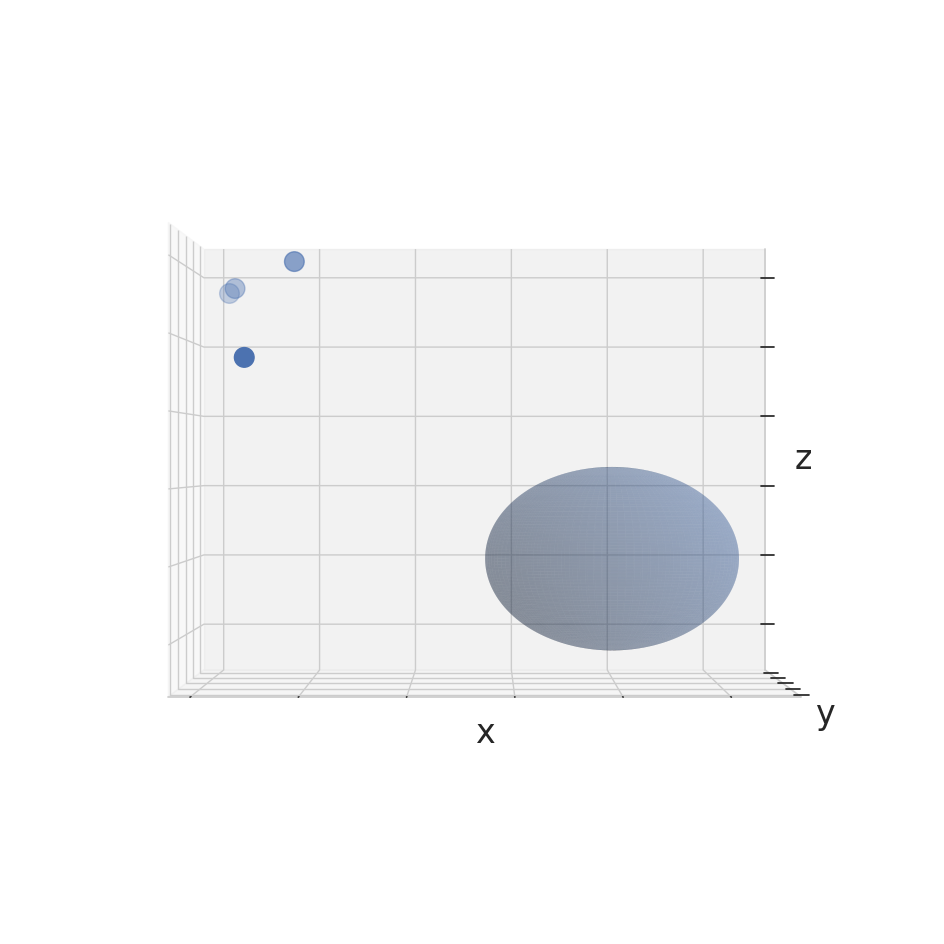

In [6]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,projection='3d')

ax.scatter(Satellites[:,0],Satellites[:,1], Satellites[:,2],s = 200)
ax.plot_surface(x, y, z, color='b',alpha = 0.3,rstride = 1,cstride = 1,linewidth = 0.0,zorder = 10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.axes.zaxis.set_ticklabels([])
ax.view_init(0,90)
plt.show()

The receiver on Earth has $xyz$ coordinates of it's own, as well as a time delay $d$ that measures the difference between its clock and the reference time.  In order to **solve for the location of the receiver** and measure it's delay, four nonlinear equations must be solved:

$F_i(\mathbf{X}) = F_i(x,y,z,d) = \sqrt{(x - A_i)^2 + (y - B_i)^2 + (z - C_i)^2} - c(t_i - d),\hspace{7mm} \text{for  } i=1,2,3,4$

Here, $c$ is the speed of light, 299792.456 km/s.  Then we want to solve the nonlinear system of equations

$\mathbf{F}(\mathbf{X}) = \mathbf{0}$,

where $\mathbf{F}(\mathbf{X}) = (F_1(\mathbf{X}),F_2(\mathbf{X}),F_3(\mathbf{X}),F_4(\mathbf{X}))^T$ and $\mathbf{X} = (x,y,z,d)^T$.

### Newton's Method
To solve the equations, we can start with an initial guess $\mathbf{X}_0$ and compute a sequence of approximate solutions by Newton's method:

$\mathbf{J}(\mathbf{X})\mathbf{S}_k = -\mathbf{F}(\mathbf{X})$

$\mathbf{X}_{k+1} = \mathbf{X}_k + \mathbf{S}_k$

$\mathbf{J}(\mathbf{X})$ is the Jacobian of $\mathbf{F}$ evaluated at $\mathbf{X}$ with entries given by $J_{ij} = \frac{\partial F_i}{\partial X_j}$.

For example, the partial derivative $\frac{\partial F_1}{\partial X_1} $ is given by:

$$\frac{\partial F_1}{\partial X_1} = \frac{\partial F_1}{\partial x} = \frac{x - A_1}{\sqrt{(x-A_1)^2 + (y - B_1)^2 + (z - C_1)^2}}$$

You can refer to the bottom of https://courses.engr.illinois.edu/cs357/sp2023/notes/ref-14-solve_nd.html for more details.

Write functions that compute both $\mathbf{F}$ and $\mathbf{J}$.

```python
def f(X):
    # X: 1d numpy array with shape (4,) with the variables (x,y,z,d)
    # Compute each nonlinear equation F_i
    # F: 1d numpy array F with shape (4,) with each entry F_i
    return F

def J(X):
    # X: 1d numpy array with shape (4,) with the variables (x,y,z,d)
    # J: 2d numpy array F with shape (4,4) with the partial derivatives dF_i / dX_j
    return J
```

Hint: 

Observe that $A_i$  $B_i$  $C_i$  and $t_i$ are column vectors of Satellites. Therefore, the derivatives with respect to these variables should also be stored columnwise in $\mathbf{J}$.

In [8]:
c = 299792.458

In [7]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 


Let's use an initial guess of a receiver at the South Pole with no time delay: $\mathbf{X}_0 = (0,0,-6370,0)^T$.  We will also store this initial guess in the list `X_hist` where we will store all the updates for `X`.

In [8]:
X = np.array([6370,0,0,0])
X_hist = [X]

In [11]:
J(X)

Starting from this guess, use Newton's method to locate the receiver on Earth. 

Store each updated `X` using `X_hist.append(X)`. 

Terminate the iterative process when $\|\mathbf{F}(\mathbf{X})\|_2 < 10^{-3}$.

In [9]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 


In [10]:
X_hist

You can run this next cell to plot **the position of the receiver** for the first 3 steps:

In [17]:
X0 = X_hist[0]
X1 = X_hist[1]
X2 = X_hist[2]
X3 = X_hist[3]

x = 6370*np.outer(np.cos(u), np.sin(v))
y = 6370*np.outer(np.sin(u), np.sin(v))
z = 6370*np.outer(np.ones(np.size(u)), np.cos(v))

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111,projection='3d')
# Plot the surface
ax.scatter(Satellites[:,0],Satellites[:,1], Satellites[:,2],s = 200)
ax.plot_surface(x, y, z, color='b',alpha = 0.3,rstride = 1,cstride = 1,linewidth = 0.0,zorder = 10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(0,90)
ax.scatter(X0[0],X0[1], X0[2],s=40,color='r',alpha = 1,zorder = 0)
ax.scatter(X1[0],X1[1], X1[2],s=40,color='b',alpha = 1,zorder = 0)
ax.scatter(X2[0],X2[1], X2[2],s=40,color='k',alpha = 1,zorder = 0)
ax.scatter(X3[0],X3[1], X3[2],s=40,color='m',alpha = 1,zorder = 0)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.axes.zaxis.set_ticklabels([])
plt.show()